In [110]:
#Import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report,recall_score,precision_score,accuracy_score)
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV
from yellowbrick.features import FeatureImportances
from sklearn import metrics
from yellowbrick.classifier import ClassificationReport
import warnings as wr
wr.filterwarnings('ignore')

In [111]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
print("The training and test set are imported.")
print("The shape of training set:", train_data.shape)
print("The shape of test set:",test_data.shape)

The training and test set are imported.
The shape of training set: (614, 13)
The shape of test set: (367, 12)


In [112]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [113]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [114]:
Loan_Status = train_data.iloc[:,12].values
#we create a copy of training set and drop the target column to carry out preprocessing
train = train_data.drop(['Loan_Status'], axis = 1)

In [115]:
#We will combine training and testing data to carry out Processing of the whole dataset. 
#We will split it after we have completed the necessary processing.
data= pd.concat([train,test_data], keys=['x', 'y'])#here X is training data and Y testing data
data = data.drop(["Loan_ID"],axis=1)
data.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
x 0   Male      No          0      Graduate            No             5849   
  1   Male     Yes          1      Graduate            No             4583   
  2   Male     Yes          0      Graduate           Yes             3000   
  3   Male     Yes          0  Not Graduate            No             2583   
  4   Male      No          0      Graduate            No             6000   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
x 0                0.0         NaN             360.0             1.0   
  1             1508.0       128.0             360.0             1.0   
  2                0.0        66.0             360.0             1.0   
  3             2358.0       120.0             360.0             1.0   
  4                0.0       141.0             360.0             1.0   

    Property_Area  
x 0         Urban  
  1         Rural  
  2         Urban  
  3         Urban  
  4         Urban

In [116]:
#We will deal with null values in both datasets
total_null = data.isnull().sum().sort_values(ascending=False) #First sum and order all null values for each variable
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False) * 100#Get the percentage
missing_data = pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
Credit_History,79,8.053007
Self_Employed,55,5.606524
LoanAmount,27,2.752294
Dependents,25,2.548420
Gender,24,2.446483
Loan_Amount_Term,20,2.038736
Married,3,0.305810
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000
ApplicantIncome,0,0.000000


In [117]:
#dealing with numerical featues
num_col=data._get_numeric_data().columns.tolist()
for col in num_col:
    data[col].fillna(data[col].mean(),inplace=True)
    

In [118]:
#dealing with categorical features
cat_col=list(set(data.columns)-set(num_col))
for col in cat_col:
    data[col].fillna(data[col].mode()[0],inplace=True)


In [119]:
#checking if all null values have been resolved
total_null = data.isnull().sum().sort_values(ascending=False) #First sum and order all null values for each variable
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False) * 100#Get the percentage
missing_data = pd.concat([total_null, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0
Married,0,0.0


In [120]:
#count total value in every catgorical feature
for i in cat_col:
    print(data[i].value_counts())


0     570
1     160
2     160
3+     91
Name: Dependents, dtype: int64
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
Male      799
Female    182
Name: Gender, dtype: int64
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64
Yes    634
No     347
Name: Married, dtype: int64
No     862
Yes    119
Name: Self_Employed, dtype: int64


In [121]:
#Encoding categorical features
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data[cat_col] = enc.fit_transform(data[cat_col])
data

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
x 0       1.0      0.0         0.0        0.0            0.0             5849   
  1       1.0      1.0         1.0        0.0            0.0             4583   
  2       1.0      1.0         0.0        0.0            1.0             3000   
  3       1.0      1.0         0.0        1.0            0.0             2583   
  4       1.0      0.0         0.0        0.0            0.0             6000   
...       ...      ...         ...        ...            ...              ...   
y 362     1.0      1.0         3.0        1.0            1.0             4009   
  363     1.0      1.0         0.0        0.0            0.0             4158   
  364     1.0      0.0         0.0        0.0            0.0             3250   
  365     1.0      1.0         0.0        0.0            0.0             5000   
  366     1.0      0.0         0.0        0.0            1.0             9200   

       CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
x 0                  0.0   142.51153             360.0         1.00000   
  1               1508.0   128.00000             360.0         1.00000   
  2                  0.0    66.00000             360.0         1.00000   
  3               2358.0   120.00000             360.0         1.00000   
  4                  0.0   141.00000             360.0         1.00000   
...                  ...         ...               ...             ...   
y 362             1777.0   113.00000             360.0         1.00000   
  363              709.0   115.00000             360.0         1.00000   
  364             1993.0   126.00000             360.0         0.83592   
  365             2393.0   158.00000             360.0         1.00000   
  366                0.0    98.00000             180.0         1.00000   

       Property_Area  
x 0              2.0  
  1              0.0  
  2              2.0  
  3              2.0  
  4              2.0  
...              ...  
y 362            2.0  
  363            2.0  
  364            1.0  
  365            0.0  
  366            0.0  

[981 rows x 11 columns]

<AxesSubplot:>

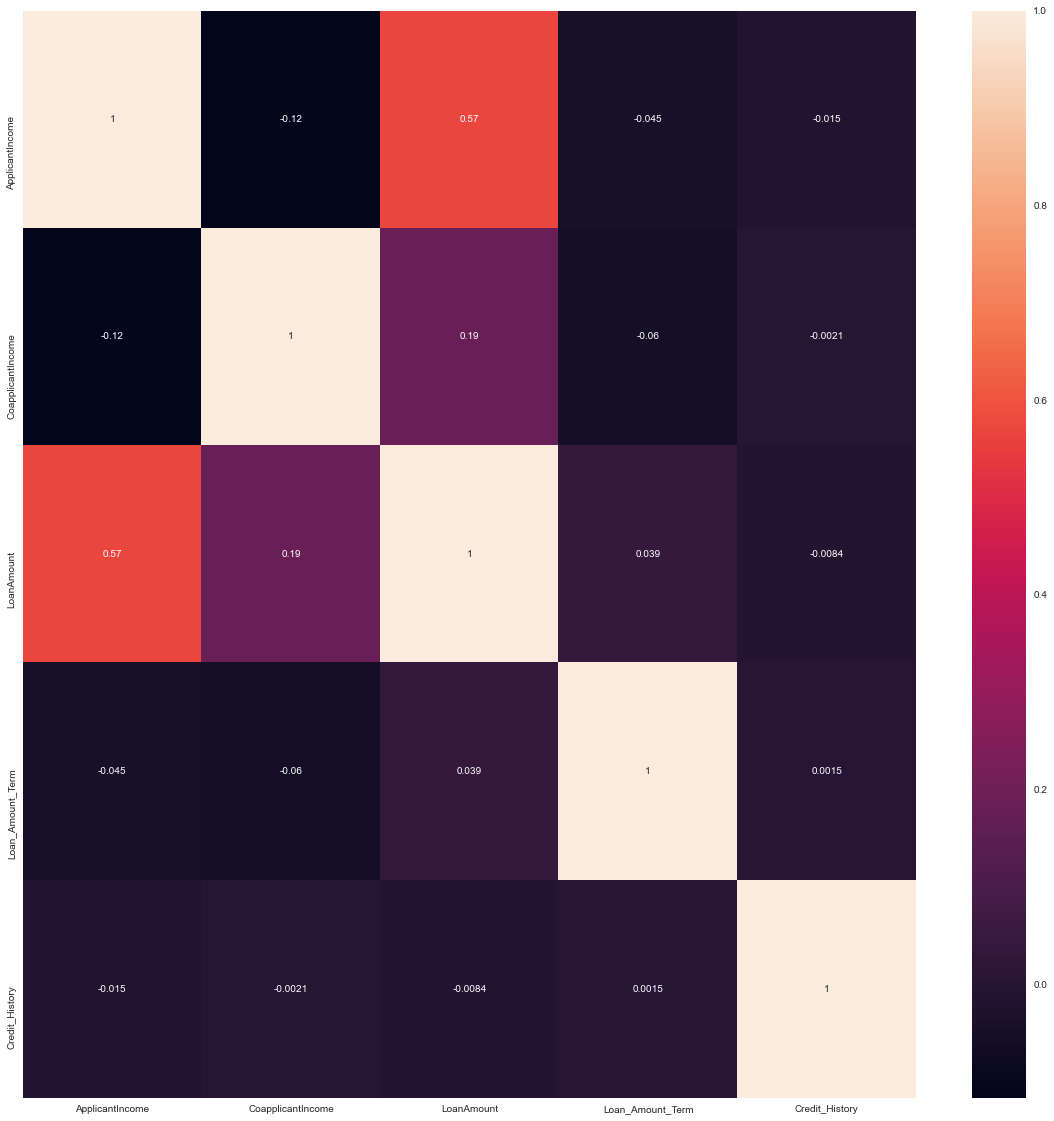

In [122]:
#Checking correlation
plt.figure(figsize = (20,20))
sns.heatmap(train_data.corr(), annot = True)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

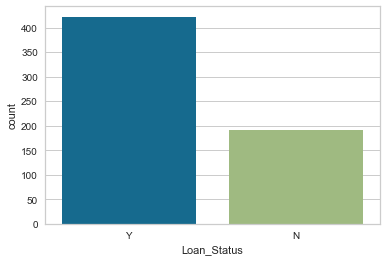

In [123]:
sns.countplot(train_data['Loan_Status'])

In [124]:
type(data)

pandas.core.frame.DataFrame

In [125]:
#Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
data[data.columns] = scaler.fit_transform(data[data.columns])
data

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
x 0       1.0      0.0    0.000000        0.0            0.0         0.072210   
  1       1.0      1.0    0.333333        0.0            0.0         0.056580   
  2       1.0      1.0    0.000000        0.0            1.0         0.037037   
  3       1.0      1.0    0.000000        1.0            0.0         0.031889   
  4       1.0      0.0    0.000000        0.0            0.0         0.074074   
...       ...      ...         ...        ...            ...              ...   
y 362     1.0      1.0    1.000000        1.0            1.0         0.049494   
  363     1.0      1.0    0.000000        0.0            0.0         0.051333   
  364     1.0      0.0    0.000000        0.0            0.0         0.040123   
  365     1.0      1.0    0.000000        0.0            0.0         0.061728   
  366     1.0      0.0    0.000000        0.0            1.0         0.113580   

       CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
x 0             0.000000    0.193215          0.746835         1.00000   
  1             0.036192    0.172214          0.746835         1.00000   
  2             0.000000    0.082489          0.746835         1.00000   
  3             0.056592    0.160637          0.746835         1.00000   
  4             0.000000    0.191027          0.746835         1.00000   
...                  ...         ...               ...             ...   
y 362           0.042648    0.150507          0.746835         1.00000   
  363           0.017016    0.153401          0.746835         1.00000   
  364           0.047832    0.169320          0.746835         0.83592   
  365           0.057432    0.215630          0.746835         1.00000   
  366           0.000000    0.128799          0.367089         1.00000   

       Property_Area  
x 0              1.0  
  1              0.0  
  2              1.0  
  3              1.0  
  4              1.0  
...              ...  
y 362            1.0  
  363            1.0  
  364            0.5  
  365            0.0  
  366            0.0  

[981 rows x 11 columns]

In [126]:
#count total value in every catgorical feature
for i in cat_col:
    print(data[i].value_counts())

0.000000    570
0.333333    160
0.666667    160
1.000000     91
Name: Dependents, dtype: int64
0.0    763
1.0    218
Name: Education, dtype: int64
1.0    799
0.0    182
Name: Gender, dtype: int64
0.5    349
1.0    342
0.0    290
Name: Property_Area, dtype: int64
1.0    634
0.0    347
Name: Married, dtype: int64
0.0    862
1.0    119
Name: Self_Employed, dtype: int64


In [127]:
#Training data after preproscing
train = data.loc["x"]
#train.insert(,column = "Loan_Status",value = Loan_Status)
enc = LabelEncoder()
train["Loan_Status"] = enc.fit_transform(Loan_Status)
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.072210,0.000000,0.193215,0.746835,1.0,1.0,1
1,1.0,1.0,0.333333,0.0,0.0,0.056580,0.036192,0.172214,0.746835,1.0,0.0,0
2,1.0,1.0,0.000000,0.0,1.0,0.037037,0.000000,0.082489,0.746835,1.0,1.0,1
3,1.0,1.0,0.000000,1.0,0.0,0.031889,0.056592,0.160637,0.746835,1.0,1.0,1
4,1.0,0.0,0.000000,0.0,0.0,0.074074,0.000000,0.191027,0.746835,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,0.0,0.0,0.035802,0.000000,0.089725,0.746835,1.0,0.0,1
610,1.0,1.0,1.000000,0.0,0.0,0.050691,0.000000,0.044863,0.367089,1.0,0.0,1
611,1.0,1.0,0.333333,0.0,0.0,0.099654,0.005760,0.353111,0.746835,1.0,1.0,1
612,1.0,1.0,0.666667,0.0,0.0,0.093617,0.000000,0.257598,0.746835,1.0,1.0,1


In [128]:
#Test data after preprocessing
test = data.loc['y']
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.000000,0.0,0.0,0.070617,0.000000,0.146165,0.746835,1.00000,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.037975,0.036000,0.169320,0.746835,1.00000,1.0
2,1.0,1.0,0.666667,0.0,0.0,0.061728,0.043200,0.287988,0.746835,1.00000,1.0
3,1.0,1.0,0.666667,0.0,0.0,0.028889,0.061104,0.131693,0.746835,0.83592,1.0
4,1.0,0.0,0.000000,1.0,0.0,0.040444,0.000000,0.099855,0.746835,1.00000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1.0,1.000000,1.0,1.0,0.049494,0.042648,0.150507,0.746835,1.00000,1.0
363,1.0,1.0,0.000000,0.0,0.0,0.051333,0.017016,0.153401,0.746835,1.00000,1.0
364,1.0,0.0,0.000000,0.0,0.0,0.040123,0.047832,0.169320,0.746835,0.83592,0.5
365,1.0,1.0,0.000000,0.0,0.0,0.061728,0.057432,0.215630,0.746835,1.00000,0.0


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

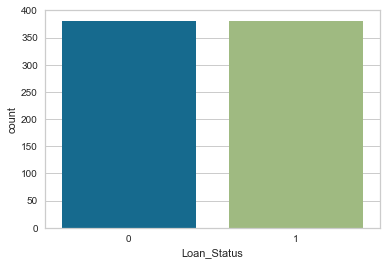

In [130]:
#Splitting training set into feature and target variables
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
sample = SMOTE()
X, y = sample.fit_resample(X, y)
sns.countplot(y_train)

In [131]:
#Splitting Train into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42 )

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(759, 11)
(85, 11)
(759,)
(85,)


In [132]:
# Compute the baseline classification accuracy for X_train
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.43529411764705883


In [133]:
#Let us try with Logistic Regression first
logReg = LogisticRegression(random_state = 42)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
print("Accuracy of predictions:", metrics.accuracy_score(y_test, y_pred))

#Cross-validation
cv1 = cross_val_score(logReg, X, y, scoring='accuracy', cv=10)
cv1 = pd.Series(cv1)
print("Cross-validation: ", cv1.mean())

Accuracy of predictions: 0.6705882352941176
Cross-validation:  0.7096498599439776


In [134]:
#GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [150, 100, 75, 50, 10, 1.0, 0.1, 0.01, 0.001, 0.0001]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
grid_search = GridSearchCV(estimator=logReg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.709277 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [135]:
#Log reg with grid search hyperparameters
gridLogReg = LogisticRegression(random_state = 42, penalty = "l1", C = 0.1, solver = "liblinear")
gridLogReg.fit(X_train, y_train)
grid_pred = gridLogReg.predict(X_test)
print("Accuracy of predictions:", metrics.accuracy_score(y_test, grid_pred))
#cross-validation
gridcv = cross_val_score(gridLogReg, X, y, scoring='accuracy', cv=10)
gridcv = pd.Series(gridcv)
print("Cross-validation: ", gridcv.mean())

Accuracy of predictions: 0.6588235294117647
Cross-validation:  0.7085994397759104


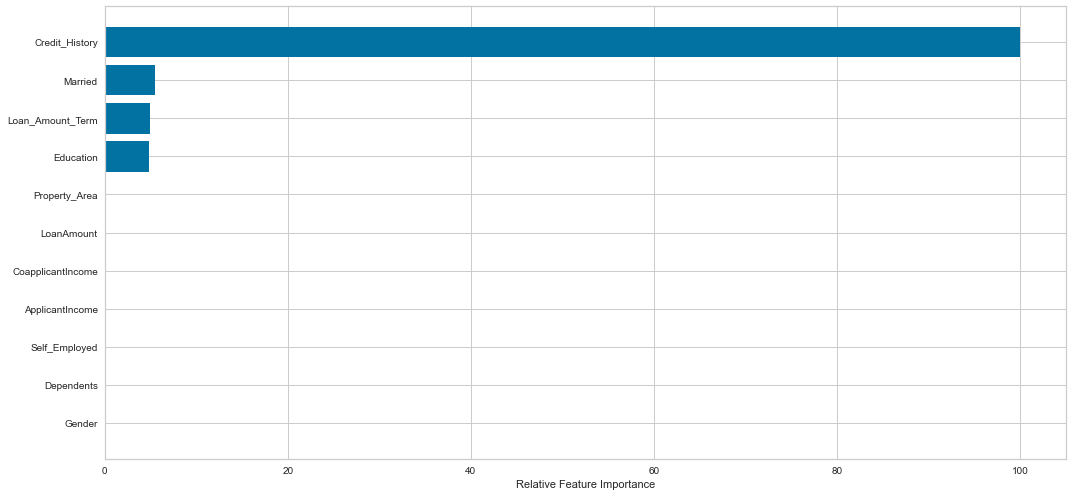

In [136]:
#Log reg feature importance visualization
feature_importance = abs(gridLogReg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=(15,7))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

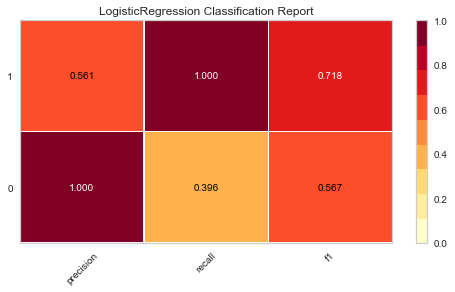

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [137]:
#Log reg classification report visualizer
visualizer = ClassificationReport(gridLogReg, size=(500, 300))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

Text(0, 0.5, 'Testing Accuracy')

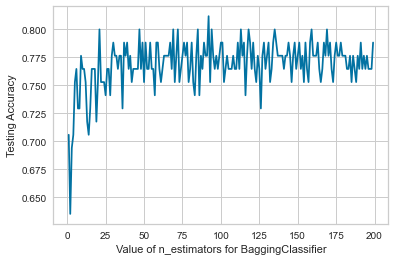

In [138]:
#Bagging Classifier
#n_estimator and testing accuracy
scoresbag =[]
for k in range(1, 200):
    bgc = BaggingClassifier(n_estimators=k)
    bgc.fit(X_train, y_train)
    y_predbag = bgc.predict(X_test)
    scoresbag.append(accuracy_score(y_test, y_predbag))
%matplotlib inline
plt.plot(range(1, 200), scoresbag)
plt.xlabel('Value of n_estimators for BaggingClassifier')
plt.ylabel('Testing Accuracy')

In [139]:
# Generic Bagging model
base_est1 = DecisionTreeClassifier()
model_bagging = BaggingClassifier(base_est1,n_estimators = 75, random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)
print('Accuracy = ', acc_bagging)
#cross-validation
bagcv = cross_val_score(model_bagging, X, y, scoring='accuracy', cv=10)
bagcv = pd.Series(bagcv)
print("Cross-validation: ", bagcv.mean())

Accuracy =  0.8
Cross-validation:  0.8025070028011203


In [140]:
#Bagging classification report
print('Classification Report:\n')
print(classification_report(y_test, pred_bagging))

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.69      0.80        48
           1       0.70      0.95      0.80        37

    accuracy                           0.80        85
   macro avg       0.82      0.82      0.80        85
weighted avg       0.84      0.80      0.80        85



Text(0, 0.5, 'Testing Accuracy')

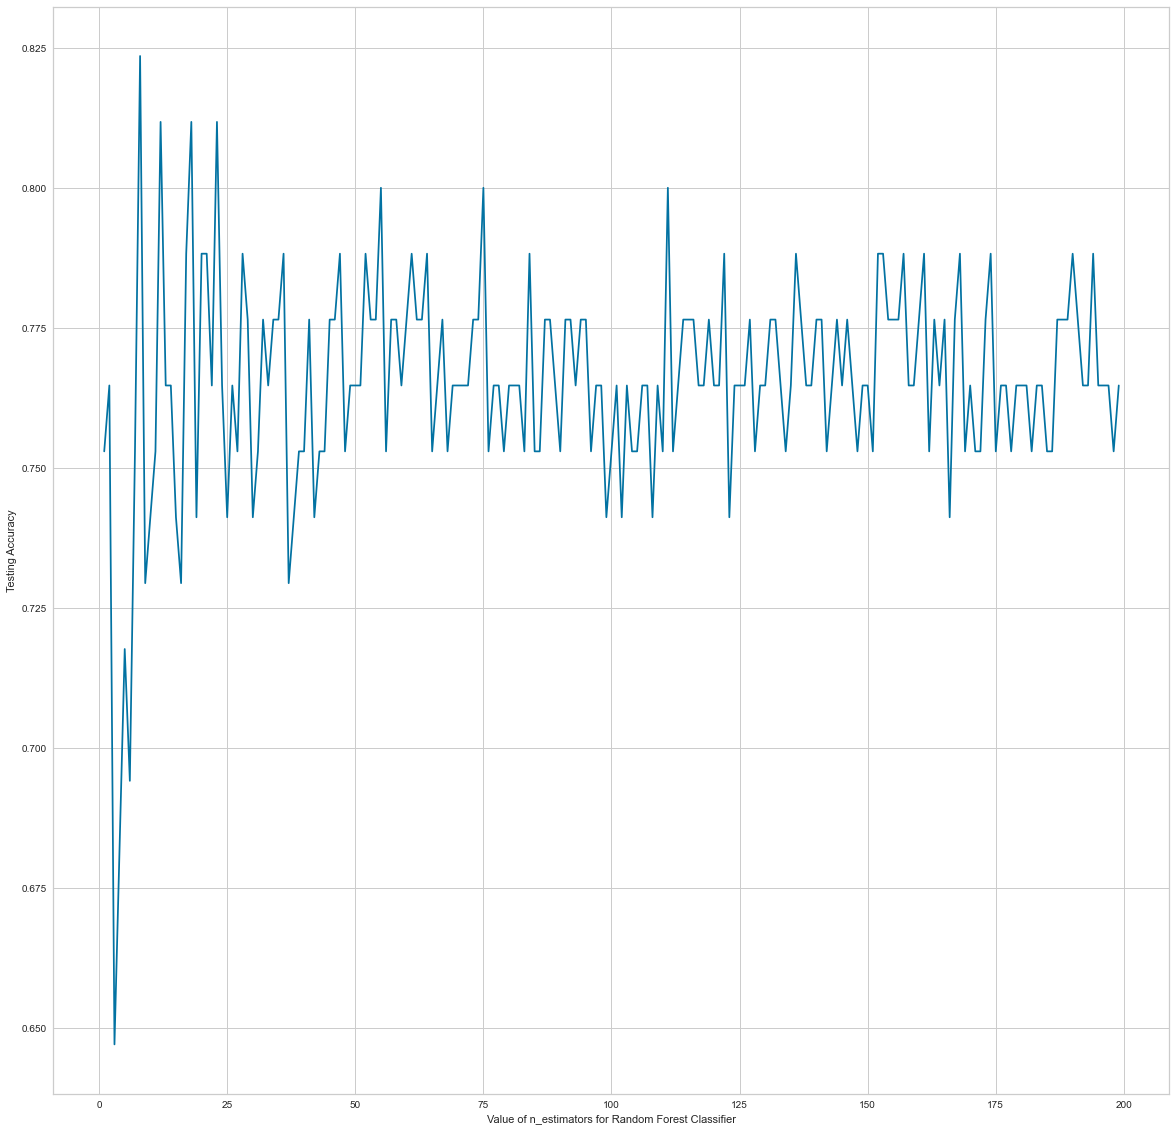

In [141]:
#Random forest n_estimator and testing accuracy
scoresrf =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_predrf = rfc.predict(X_test)
    scoresrf.append(accuracy_score(y_test, y_predrf))
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
plt.plot(range(1, 200), scoresrf)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [142]:
#Random Forest model
model_rf = RandomForestClassifier(n_estimators= 35,random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predict_rf)
print("Accuracy:", accuracy_rf)
#cross-validation
rfcv = cross_val_score(model_rf, X, y, scoring='accuracy', cv=10)
rfcv = pd.Series(rfcv)
print("Cross-validation: ", rfcv.mean())

Accuracy: 0.788235294117647
Cross-validation:  0.8226050420168066


<AxesSubplot:>

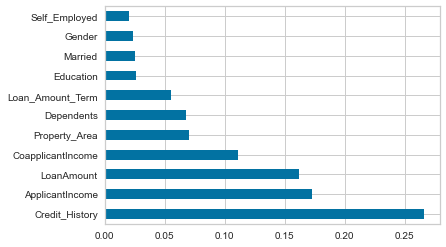

In [143]:
#Random forest feature importance
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', )

In [144]:
# Top 3 features for RandomForest
rimp=pd.DataFrame(zip(X_train.columns, model_rf.feature_importances_))
rfimp = (rimp.sort_values(1, ascending = False))
print("Three most important features: \n", rfimp.iloc[:3])

Three most important features: 
                  0         1
9   Credit_History  0.265926
5  ApplicantIncome  0.173015
7       LoanAmount  0.162074


In [145]:
#oob score
model_rf_oob = RandomForestClassifier(n_estimators=40, max_features=6, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)

OOB Score:			 0.8169
Testing Accuracy:		 0.7647
Acc. Difference:		 0.0522


Text(0, 0.5, 'Testing Accuracy')

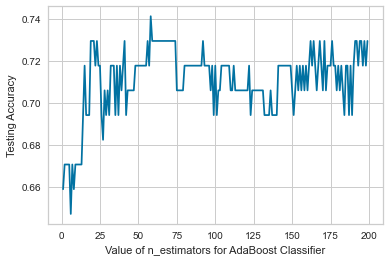

In [146]:
#adaboost n_estimator and testing accuracy
scoresada =[]
for k in range(1, 200):
    adac = AdaBoostClassifier(n_estimators=k)
    adac.fit(X_train, y_train)
    y_predada = adac.predict(X_test)
    scoresada.append(accuracy_score(y_test, y_predada))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, 200), scoresada)
plt.xlabel('Value of n_estimators for AdaBoost Classifier')
plt.ylabel('Testing Accuracy')

In [147]:
# AdaBoost Classification
base_est2 = DecisionTreeClassifier(max_depth = 7)
ada_boost = AdaBoostClassifier(base_est2, n_estimators=30, random_state=42, learning_rate=0.5)
ada_boost.fit(X_train, y_train)
predict_bs = ada_boost.predict(X_test)
accuracy_bs = accuracy_score(y_test, predict_bs)
print("Accuracy: ", accuracy_bs)

#cross-validation
adacv = cross_val_score(ada_boost, X, y, scoring='accuracy', cv=10)
adacv = pd.Series(adacv)
print("Cross validation: ", adacv.mean())

Accuracy:  0.7411764705882353
Cross validation:  0.799859943977591


<AxesSubplot:>

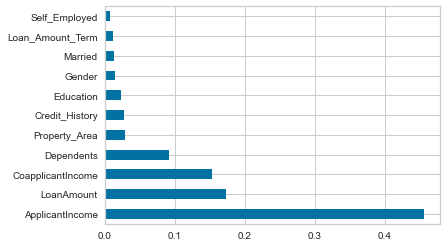

In [148]:
#AdaBoost feature importance
ada_importances = pd.Series(ada_boost.feature_importances_, index=X.columns)
ada_importances.nlargest(20).plot(kind='barh')

In [149]:
# Top 3 features for AdaBoost
aimp=pd.DataFrame(zip(X_train.columns, ada_boost
                     .feature_importances_))
adimp = (aimp.sort_values(1, ascending = False))
print("Three most important features: \n", adimp.iloc[:3])

Three most important features: 
                    0         1
5    ApplicantIncome  0.455668
7         LoanAmount  0.173152
6  CoapplicantIncome  0.153738


Text(0, 0.5, 'Testing Accuracy')

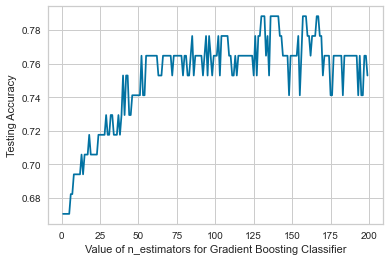

In [150]:
#gradient boosting n_estimator and testing accuracy
scoresgbc =[]
for k in range(1, 200):
    gbc = GradientBoostingClassifier(n_estimators=k)
    gbc.fit(X_train, y_train)
    y_predgbc = gbc.predict(X_test)
    scoresgbc.append(accuracy_score(y_test, y_predgbc))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1, 200), scoresgbc)
plt.xlabel('Value of n_estimators for Gradient Boosting Classifier')
plt.ylabel('Testing Accuracy')

In [151]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 150, random_state=42, max_depth = 8,learning_rate = 0.78).fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, gbc_pred)
print("Accuracy:", accuracy_gbc)

#cross-validation
gbccv = cross_val_score(gbc, X, y, scoring='accuracy', cv=10)
gbccv = pd.Series(gbccv)
print("Cross-validation: ", gbccv.mean())

Accuracy: 0.788235294117647
Cross-validation:  0.810686274509804


<AxesSubplot:>

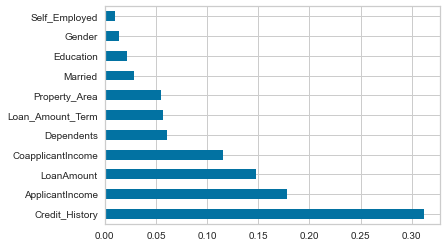

In [152]:
#Gradient Boost feature importance
gbc_importances = pd.Series(gbc.feature_importances_, index=X.columns)
gbc_importances.nlargest(20).plot(kind='barh')

In [153]:
# Top 3 features for Gradient Boosting
gimp=pd.DataFrame(zip(X_train.columns,gbc
                     .feature_importances_))
gbimp = (gimp.sort_values(1, ascending = False))
print("Three most important features: \n", gbimp.iloc[:3])

Three most important features: 
                  0         1
9   Credit_History  0.311773
5  ApplicantIncome  0.178570
7       LoanAmount  0.148110


In [154]:
#Voting Classifier
rfClf = RandomForestClassifier(n_estimators=35, random_state=42)
gbClf = GradientBoostingClassifier(n_estimators = 150, random_state=42, max_depth = 8,learning_rate = 0.78).fit(X_train, y_train)
adaClf = AdaBoostClassifier(base_est2, n_estimators= 30, random_state=42, learning_rate=0.5)
vclf = VotingClassifier(estimators = [('rf',rfClf),  ('gbc',gbClf), ('ada', adaClf)], voting='soft') 
vclf.fit(X_train, y_train)
vclf_pred = vclf.predict(X_test)
accuracy_voting = accuracy_score(y_test, vclf_pred)
print('Accuracy score', accuracy_voting)
#cross-validation
vcv = cross_val_score(vclf, X, y, scoring='accuracy', cv=10)
vcv = pd.Series(vcv)
print("Cross-validation: ", vcv.mean())

Accuracy score 0.7764705882352941
Cross-validation:  0.8154761904761905


In [155]:
final_pred = model_rf.predict(test)
pred = enc.inverse_transform(final_pred)
pred

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [156]:
Loan_id = test_data["Loan_ID"]
submission_dict = { 'Loan_ID': Loan_id, "Loan_Status": pred}
submission = pd.DataFrame.from_dict(submission_dict)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [157]:
submission.to_csv("Submission1.csv", index = False)